<a href="https://colab.research.google.com/github/paulatorres2/logis/blob/main/regresion_logistica.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
   CustomerID  Age         Income  Clicks  Purchases
0        2295   19   61770.217668      96          5
1        2385   66   72535.876847       1          0
2        1942   67   31468.931781      34          9
3        4280   48  119171.422879       9          2
4        2033   54   50246.782698      63          8
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1

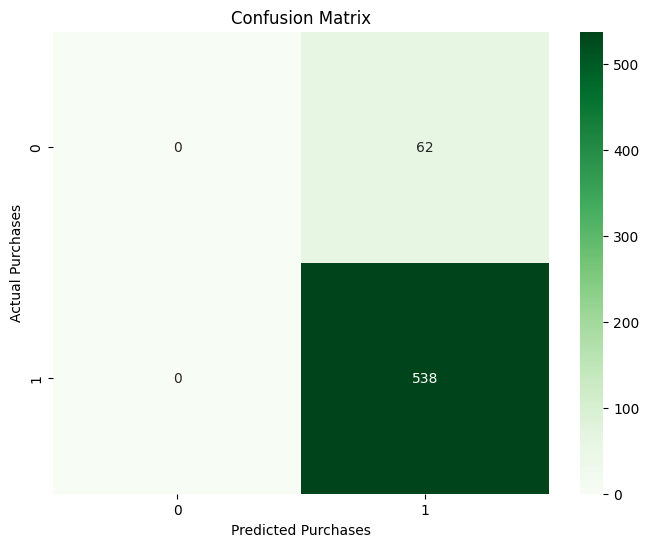

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        62
           1       0.90      1.00      0.95       538

    accuracy                           0.90       600
   macro avg       0.45      0.50      0.47       600
weighted avg       0.80      0.90      0.85       600

Exactitud del modelo: 89.67%


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [3]:
#Se importan las librerias
import pandas as pd
import numpy as np
from google.colab import drive
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

#Se sube el dataset
drive.mount('/content/drive')


archivo_csv = '/content/drive/My Drive/marketing_data.csv'
data = pd.read_csv(archivo_csv)
print(data.head())

#Se convierten los datos a binario
data['Purchases'] = data['Purchases'].apply(lambda x: 1 if x > 0 else 0)

#Se tienen en cuenta las columnas 1, 2 y 3 como variables independientes y la columna 4 como la variable dependiente
x = data.iloc[:, [1, 2, 3]].values
y = data.iloc[:, 4].values

#se dividen los datos para entrenar el modelo y luego probarlo
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=0)

#Se escalan los dattos
x_train = StandardScaler().fit_transform(x_train)
x_test = StandardScaler().fit_transform(x_test)

#se crea el modelo de regresion logistica  y se ajusta el modelo con los datos de entrenamiento
reg = LogisticRegression(random_state=0)
reg.fit(x_train, y_train)


#se utiliza el modelo entrenado para predecir los valores de prueba
y_pred = reg.predict(x_test)


#se muestran y comparan los resultados reales y predichos
print(y_pred)
print(y_test)


#se crea la matriz de confusion
matriz = confusion_matrix(y_test, y_pred)
print(matriz)

#se crea el mapa de calor de la matriz de confusion
plt.figure(figsize=(8,6))
sns.heatmap(matriz, annot=True, fmt='d', cmap='Greens', cbar=True)
plt.xlabel('Predicted Purchases')
plt.ylabel('Actual Purchases')
plt.title('Confusion Matrix')
plt.show()

#Evaluar la exactitud del modelo
print(classification_report(y_test, y_pred))
accuracy =accuracy_score(y_test, y_pred)
print(f'Exactitud del modelo: {accuracy*100:.2f}%')


# x_set, y_set = x_train, y_train
# x1, x2 = np.meshgrid(np.arange(start = x_set[:, 0].min() - 1, stop = x_set[:, 0].max() + 1, step = 0.01),
#                      np.arange(start = x_set[:, 1].min() - 1, stop = x_set[:, 1].max() + 1, step = 0.01))

# plt.xlim(x1.min(), x1.max())
# plt.ylim(x2.min(), x2.max())
# for i,j in enumerate(np.unique(y_set)):
#     plt.scatter(x_set[y_set == j, 0], x_set[y_set == j, 1],
#                 c = ListedColormap(('blue', 'black'))(i), label = j)


# plt.title('Logistic Regression (Training set)')
# plt.xlabel('Age')
# plt.ylabel('Estimated Purchases')
# plt.legend()
# plt.show()